# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "VAE"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'VAE',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                     PI                        \
var                                       SS DF      F p-unc   np2   
protein groups               Source                                  
A0A024QZX5;A0A087X1N8;P35237 AD        0.497  1  0.906 0.342 0.005   
                             age       0.127  1  0.231 0.631 0.001   
                             Kiel      2.088  1  3.808 0.052 0.020   
                             Magdeburg 4.481  1  8.175 0.005 0.041   
                             Sweden    7.116  1 12.981 0.000 0.064   
...                                      ... ..    ...   ...   ...   
S4R3U6                       AD        0.256  1  0.253 0.615 0.001   
                             age       1.712  1  1.690 0.195 0.009   
                             Kiel      0.004  1  0.004 0.947 0.000   
                             Magdeburg 3.925  1  3.874 0.050 0.020   
                             Sweden    7.789  1  7.689 0.006 0.039   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.466  0.504    False  
                             age               0.200  0.758    False  
                             Kiel              1.280  0.126    False  
                             Magdeburg         2.326  0.018     True  
                             Sweden            3.397  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.211  0.746    False  
                             age               0.710  0.340    False  
                             Kiel              0.024  0.969    False  
                             Magdeburg         1.297  0.122    False  
                             Sweden            2.214  0.022     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                     VAE                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.936  1  6.896 0.009 0.035   
                             age        0.002  1  0.016 0.900 0.000   
                             Kiel       0.234  1  1.726 0.190 0.009   
                             Magdeburg  0.488  1  3.591 0.060 0.018   
                             Sweden     1.746  1 12.860 0.000 0.063   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.966  1  3.963 0.048 0.020   
                             age        0.534  1  1.076 0.301 0.006   
                             Kiel       2.339  1  4.713 0.031 0.024   
                             Magdeburg  2.359  1  4.754 0.030 0.024   
                             Sweden    16.918  1 34.096 0.000 0.151   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.030  0.026     True  
                             age               0.046  0.936    False  
                             Kiel              0.720  0.304    False  
                             Magdeburg         1.225  0.120    False  
                             Sweden            3.370  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.319  0.100    False  
                             age               0.522  0.435    False  
                             Kiel              1.506  0.070    False  
                             Magdeburg         1.516  0.069    False  
                             Sweden            7.653  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.342         0.466  0.504    False   
                             Kiel      0.052         1.280  0.126    False   
                             Magdeburg 0.005         2.326  0.018     True   
                             Sweden    0.000         3.397  0.002     True   
                             age       0.631         0.200  0.758    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.615         0.211  0.746    False   
                             Kiel      0.947         0.024  0.969    False   
                             Magdeburg 0.050         1.297  0.122    False   
                             Sweden    0.006         2.214  0.022     True   
                             age       0.195         0.710  0.340    False   

model                                    VAE                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.009         2.030  0.026     True  
                             Kiel      0.190         0.720  0.304    False  
                             Magdeburg 0.060         1.225  0.120    False  
                             Sweden    0.000         3.370  0.002     True  
                             age       0.900         0.046  0.936    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.048         1.319  0.100    False  
                             Kiel      0.031         1.506  0.070    False  
                             Magdeburg 0.030         1.516  0.069    False  
                             Sweden    0.000         7.653  0.000     True  
                             age       0.301         0.522  0.435    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'VAE': 'VAE'}

## Describe scores

In [10]:
scores.describe()

model        PI                               VAE                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.260         2.485     0.336     0.227         3.293     0.281
std       0.303         5.330     0.330     0.295         6.183     0.321
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.340     0.015     0.001         0.405     0.002
50%       0.121         0.918     0.241     0.063         1.204     0.125
75%       0.457         2.419     0.609     0.394         3.280     0.525
max       1.000       146.334     1.000     1.000        84.474     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_49709/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.342         0.466   
A0A024R0T9;K7ER74;P02655                           AD     0.043         1.366   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.067         1.171   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.485         0.314   
A0A075B6H7                                         AD     0.061         1.214   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.042         1.376   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.499         0.302   
S4R3U6                                             AD     0.615         0.211   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.504    False   
A0A024R0T9;K7ER74;P02655                           AD      0.108    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.153    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.635    False   
A0A075B6H7                                         AD      0.142    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.316    False   
Q9Y6X5                                             AD      0.106    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.181    False   
Q9Y6Y9                                             AD      0.649    False   
S4R3U6                                             AD      0.746    False   

model                                                       VAE                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.009         2.030   
A0A024R0T9;K7ER74;P02655                           AD     0.034         1.474   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.403         0.395   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.254         0.596   
A0A075B6H7                                         AD     0.001         2.997   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.172         0.765   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.326         0.487   
S4R3U6                                             AD     0.048         1.319   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.026     True  
A0A024R0T9;K7ER74;P02655                           AD      0.075    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.533    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.380    False  
A0A075B6H7                                         AD      0.004     True  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                               VAE                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.250         1.402     0.333     0.239         1.558     0.300
std       0.286         1.620     0.313     0.292         1.783     0.315
min       0.000         0.001     0.000     0.000         0.000     0.000
25%       0.012         0.363     0.038     0.007         0.386     0.021
50%       0.124         0.906     0.246     0.092         1.035     0.171
75%       0.434         1.931     0.590     0.412         2.134     0.544
max       0.998        22.287     0.999     1.000        19.702     1.000

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,VAE
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1030,949


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.342         0.466  0.504   
A0A024R0T9;K7ER74;P02655                           0.043         1.366  0.108   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.067         1.171  0.153   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.485         0.314  0.635   
A0A075B6H7                                         0.061         1.214  0.142   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.316   
Q9Y6X5                                             0.042         1.376  0.106   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.181   
Q9Y6Y9                                             0.499         0.302  0.649   
S4R3U6                                             0.615         0.211  0.746   

                                                              VAE  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.009   
A0A024R0T9;K7ER74;P02655                              False 0.034   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.403   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.254   
A0A075B6H7                                            False 0.001   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.172   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.326   
S4R3U6                                                False 0.048   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               2.030  0.026   
A0A024R0T9;K7ER74;P02655                                   1.474  0.075   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.395  0.533   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.596  0.380   
A0A075B6H7                                                 2.997  0.004   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.285   
Q9Y6X5                                                     0.765  0.281   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.158   
Q9Y6Y9                                                     0.487  0.460   
S4R3U6                                                     1.319  0.100   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                           True       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                             True        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - VAE (no)    886
PI (yes) - VAE (yes)   328
PI (no)  - VAE (yes)   144
PI (yes) - VAE (no)     63
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_49709/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


PI                                 VAE  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.342         0.466  0.504    False 0.009   
A0A075B6H7                   0.061         1.214  0.142    False 0.001   
A0A075B6I0                   0.026         1.582  0.074    False 0.001   
A0A075B6J9                   0.046         1.336  0.114    False 0.013   
A0A075B6Q5                   0.753         0.123  0.847    False 0.005   
...                            ...           ...    ...      ...   ...   
Q9UKB5                       0.008         2.084  0.029     True 0.319   
Q9ULZ9                       0.001         2.945  0.005     True 0.029   
Q9UMX0;Q9UMX0-2;Q9UMX0-4     0.025         1.609  0.070    False 0.010   
Q9UNW1                       0.011         1.972  0.035     True 0.898   
Q9UP79                       0.435         0.361  0.591    False 0.000   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         2.030  0.026     True       186  
A0A075B6H7                           2.997  0.004     True        91  
A0A075B6I0                           3.168  0.003     True       194  
A0A075B6J9                           1.884  0.034     True       156  
A0A075B6Q5                           2.281  0.016     True       104  
...                                    ...    ...      ...       ...  
Q9UKB5                               0.496  0.454    False       148  
Q9ULZ9                               1.536  0.066    False       171  
Q9UMX0;Q9UMX0-2;Q9UMX0-4             1.992  0.027     True        57  
Q9UNW1                               0.047  0.936    False       171  
Q9UP79                               3.733  0.001     True       135  

[207 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,VAE,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.504,0.026,186,PI (no) - VAE (yes)
A0A024R0T9;K7ER74;P02655,0.108,0.075,195,PI (no) - VAE (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.153,0.533,174,PI (no) - VAE (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.635,0.380,196,PI (no) - VAE (no)
A0A075B6H7,0.142,0.004,91,PI (no) - VAE (yes)
...,...,...,...,...
Q9Y6R7,0.316,0.285,197,PI (no) - VAE (no)
Q9Y6X5,0.106,0.281,173,PI (no) - VAE (no)
Q9Y6Y8;Q9Y6Y8-2,0.181,0.158,197,PI (no) - VAE (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,VAE,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
A0A0C4DH31,0.986,0.014,52,PI (no) - VAE (yes),0.973
F6VDH7;P50502;Q3KNR6,0.010,0.964,175,PI (yes) - VAE (no),0.954
P52758,0.001,0.923,119,PI (yes) - VAE (no),0.922
Q6P4E1;Q6P4E1-4;Q6P4E1-5,0.035,0.950,178,PI (yes) - VAE (no),0.915
A6NCT7;Q07092;Q07092-2,0.913,0.004,147,PI (no) - VAE (yes),0.909
...,...,...,...,...,...
Q9NX62,0.055,0.046,197,PI (no) - VAE (yes),0.010
P00740;P00740-2,0.053,0.043,197,PI (no) - VAE (yes),0.010
K7ERG9;P00746,0.052,0.042,197,PI (no) - VAE (yes),0.009


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_comparision_1_VAE


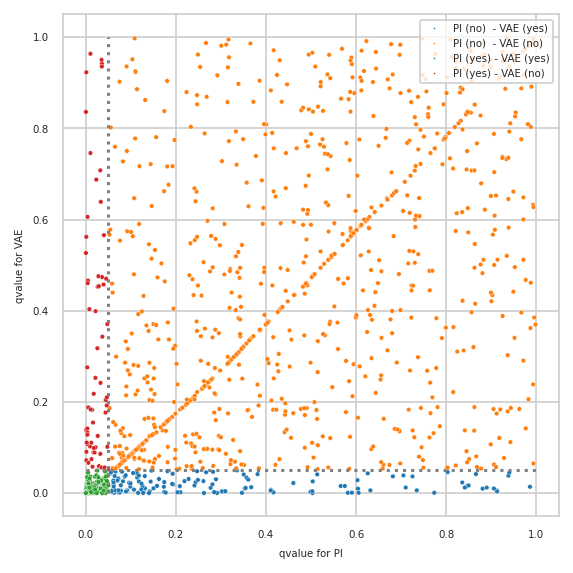

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_comparision_2_VAE


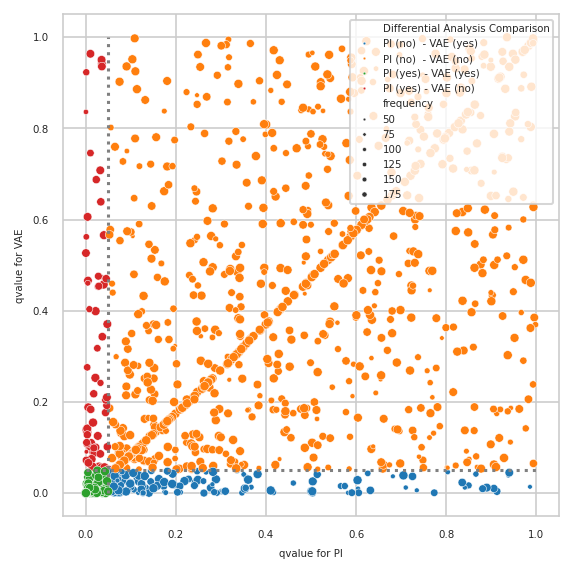

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APP,ENSP00000284981,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
MAPT,ENSP00000340820,4.800
...,...,...
TSPYL2,ENSP00000364591,0.681
MRPL1,ENSP00000315017,0.681
AASS,ENSP00000403768,0.681


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/3fa5fb1d5dd2a817778dc1597a6471cf_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out